#### Workshop computational methods

* Find root for $f(x)=x^2 - 11$
* build your own bisection method function using **while** loop
* make graphic for approximation evolution  (append results to an initially empty list of x_n)


In [1]:
#Import libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function for root finding
def f(x):
    return x**2 - 11

Ingrese el valor del límite inferior del intervalo: 
None0
Ingrese el valor del límite superior del intervalo: 
None10
Número de iteraciones: 18
La solución es: 3.3166


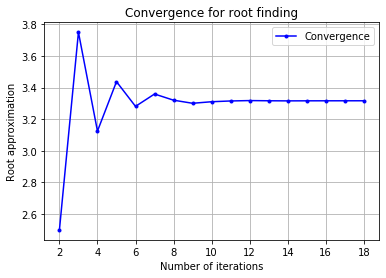

In [9]:
a = float(input(print('Ingrese el valor del límite inferior del intervalo: ')))
b = float(input(print('Ingrese el valor del límite superior del intervalo: ')))
def bisection(f, x_a, x_b, eps, return_x_list=True):
    f_a = f(x_a)
    if f_a*f(x_b) > 0: # Condición de búsqueda de la raíz
        print("Error! La función no cambia de signo en el intervalo, ingrese otros límites")
        sys.exit(1)
    x_M = float(x_a + x_b)/2.0 # Se considera el punto medio
    f_M = f(x_M) # Se evalúa la función en el punto
    i = 1
    
    if return_x_list:
        x_list = [] #Crear las listas vacías
        iteration = [] # Crear las listas vacías 

    while abs(f_M) > eps:
        if f_a*f_M > 0:   # Tienen el mismo signo
            x_a = x_M # Se redefinen los valores de los límites 
            f_a = f_M  # Se redefinen los valores de los límites
        else:
            x_b = x_M # Se reemplaza el punto medio por el límite inferior
        x_M = float(x_a + x_b)/2.0
        f_M = f(x_M)
        i += 1
        if return_x_list:
            x_list.append(x_M)
            iteration.append(i)
    plt.title('Convergence for root finding')
    plt.plot(iteration, x_list, 'b.-', label='Convergence')
    plt.xlabel('Number of iterations')
    plt.ylabel('Root approximation')
    plt.grid()
    plt.legend()
    if return_x_list:
        return x_list, i
    else:
        return x_M, i


solucion, iterations = bisection(f, a, b, eps=1.0e-4)

print("Número de iteraciones: %d" % (iterations))
print('La solución es: %.4f'%(solucion[-1])) # Como solución es una lista, entonces en la última posición está la raíz


A medida que se disminuye el valor de la toleracia se observa que la convergencia es en menor iteraciones pero, hay una posibilidad de oscilación durante la búsqueda de la raíz.

* build your own Newton-Raphson method using **while** loop
* make graphic for approximation evolution  (append results to an initially empty list of x_n)

In [10]:
# Para este código se necesita la función y su derivative, por lo tanto, hay dos formas de hacerlos, con variable simbólica
# o a fuerza bruta ingresando cada una de las funciónes
def Newton_Raphson(f,Df,p0,eps=1e-8,Nmax=100):
    iterations = [] #Listas vacías para el almacenamiento de iteraciones y el valor de la aproximacion
    approximations = []
    i=1 # Inicialización de las variables
    while i<Nmax:
        p = p0 -f(p0)/Df(p0) #Fórmula de Newton-Raphson
        #print (i, p, f(p))  
        iterations.append(i) # Se agrega el contador
        approximations.append(p) # Se agrega el valor de la aproximación de acuerdo a cada contador
        if ( np.abs(p - p0) < eps ): break # condición de parada.
        i=i+1   # Contador
        p0 = p
        plt.title('Convergence for root finding')
        plt.xlabel('Number of iterations')
        plt.ylabel('Root approximation')
        plt.plot(iterations,approximations, 'r.-')
      #if (i == Nmax): print ("el método falló")
    return p,i-1 

El valor de la raíz es: 3.3166
La cantidad de iteraciones es:  6


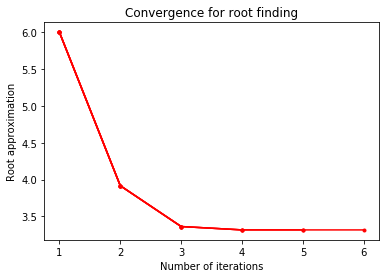

In [11]:
root, number =  Newton_Raphson(lambda x: x**2-11 ,lambda x: 2*x,1,1.e-10)
print('El valor de la raíz es: %.4f'%root)
print('La cantidad de iteraciones es: ',number)


Se puede concluir que el método de Newton-Raphson es mucho más rápido, sin embargo, su problema está en obtener la derivada de la función